## User Exploration

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')
print("There were", train_users.shape[0], "users in the training set and", test_users.shape[0], "in the test set.")
print("In total there were", train_users.shape[0] + test_users.shape[0], "users.")

There were 213451 users in the training set and 62096 in the test set.
In total there were 275547 users.


In [17]:
df = pd.concat((train_users, test_users), axis=0, ignore_index=True)

### Missing Data

In [18]:
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [19]:
df.head(10)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758


In [20]:
df['gender'].unique(), df['first_browser'].unique()

(array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object),
 array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
        'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
        'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
        'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
        'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
        'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
        'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
        'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
        'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
        'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
        'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
        'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon', 'IBrowse',
        'Nintendo Browser', 'UC Browser'], dtype=object))

In [21]:
df.gender.replace('-unknown-', np.nan, inplace=True)
df.first_browser.replace('-unknown-', np.nan, inplace=True)

In [22]:
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser               44394
first_device_type               0
gender                     129480
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [23]:
df.drop('date_first_booking', axis=1, inplace=True)

In [24]:
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
first_affiliate_tracked      6085
first_browser               44394
first_device_type               0
gender                     129480
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

### Users' Age

In [25]:
df.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

The maximum age is 2014, this is not possible. It seems that some users have filled a year instead of their age. Also the minimun age at 1 sounds rediculous. According to Airbnb's contract, users at the platform must be at least 18 years old. However, this is not enforced. 

In [26]:
df.loc[df['age'] > 1000]['age'].describe()

count     828.000000
mean     2007.117150
std        22.219408
min      1920.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [27]:
df.loc[df['age'] < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

So we will first correct every mistakenly filled the age.

In [28]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']

In [29]:
df.age.describe()

count    158681.000000
mean         36.713274
std          14.046364
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max         150.000000
Name: age, dtype: float64

After that, the Minimum age at 1 and Maximum age at 150 were not realistic, we will set limit for the age, and set nan for outliers. 

In [30]:
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 16, 'age'] = np.nan

In [31]:
df['age'].describe()

count    155887.000000
mean         36.033370
std          11.589997
min          16.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

Looks more reasonable. We can now visualize the age.

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


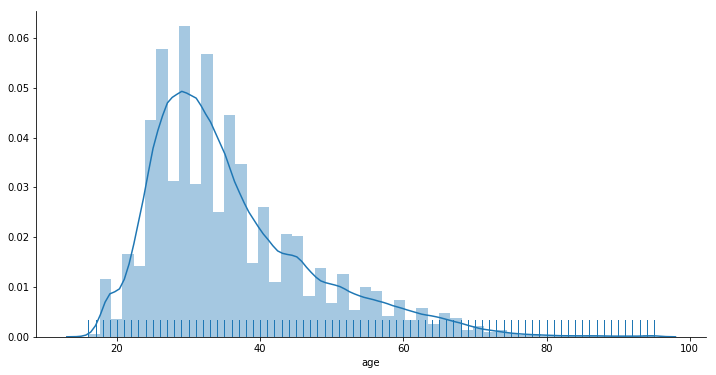

In [32]:
plt.figure(figsize=(12,6))
sns.distplot(df.age.dropna(), rug=True)
sns.despine()

As expected, the most common age of Airbnb users is between 25 and 40.

### Users' Gender

In [33]:
df.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,20091208061105


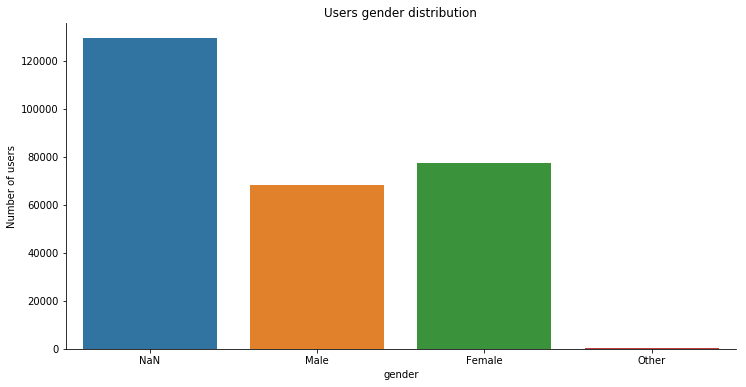

In [34]:
plt.figure(figsize=(12,6))
df["gender"] = df['gender'].fillna('M')
sns.countplot(data=df, x='gender')
plt.xticks(np.arange(4), ("NaN", "Male", "Female", "Other"))
plt.ylabel('Number of users')
plt.title('Users gender distribution')
sns.despine()

Approx. 45% of users' gender were not presented. And there is no significant difference between female and male users on Airbnb's platform.

### Travel Destination Country

This is the what we will predict in the test data.

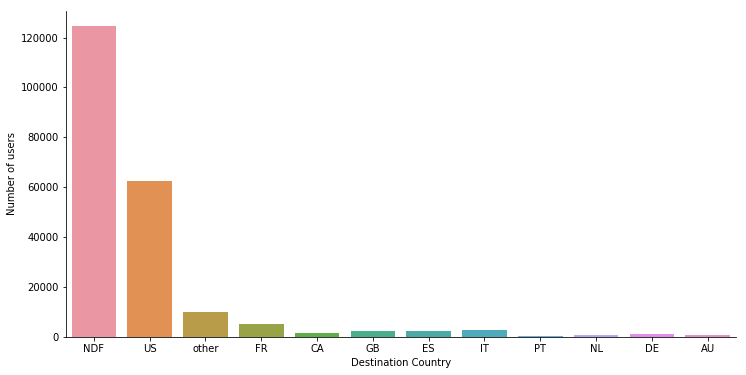

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df)
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
sns.despine()

Nearly 60% of users did not book any destination (NDF). The most booked country is the US (nearly 30% of all users booked US), given all users in the data set are from the US. We can say that users in the dataset are more likely to travel within the US. We will only study users who made at least one reservation, and removing users who did not book any destination.

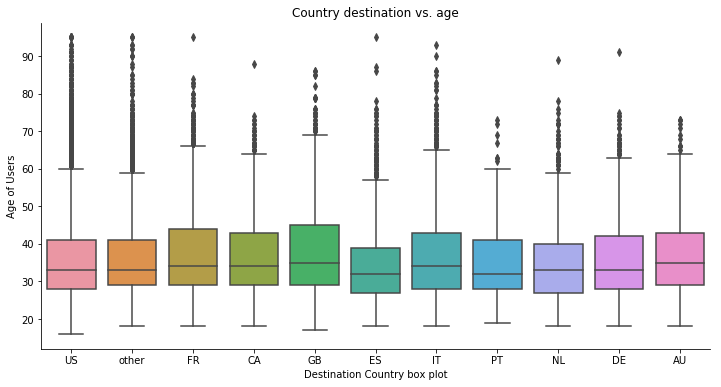

In [35]:
plt.figure(figsize=(12,6))
df_without_NDF = df[df['country_destination']!='NDF']
sns.boxplot(y='age' , x='country_destination',data=df_without_NDF)
plt.xlabel('Destination Country box plot')
plt.ylabel('Age of Users')
plt.title('Country destination vs. age')
sns.despine()

There were no significant age difference among users who book difference destinations. However, users who booked Great Britain tend to be a little older than users who booked Spain and Portugal.

### Users' Signup

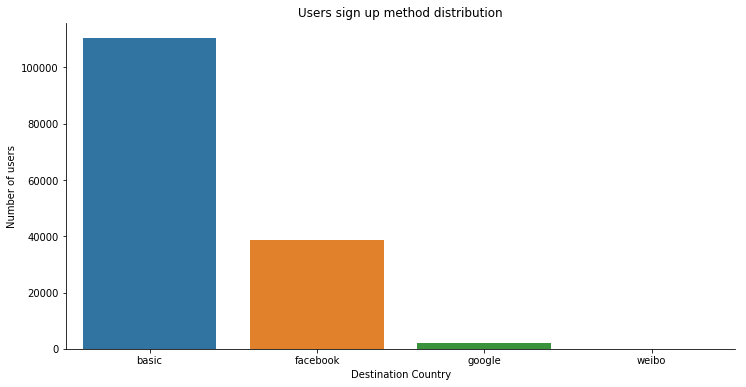

In [25]:
plt.figure(figsize=(12,6))
df_without_NDF = df[df['country_destination']!='NDF']
sns.countplot(x='signup_method', data = df_without_NDF)
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up method distribution')
sns.despine()

Over 70% of all bookers in the data used basic email method to sign up with Airbnb, and less than 30% of bookers used their facebook account to sign up, approx. only 0.26% of the bookers in the data used their Google accounts to sign up.

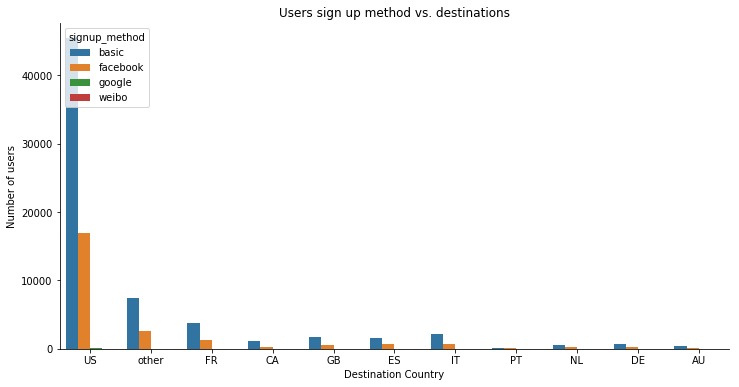

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data = df_without_NDF, hue = 'signup_method')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up method vs. destinations')
sns.despine()

For users who made booking at least once, most of them signed up with Airbnb through basic email method, no matter which country they were travelling to.

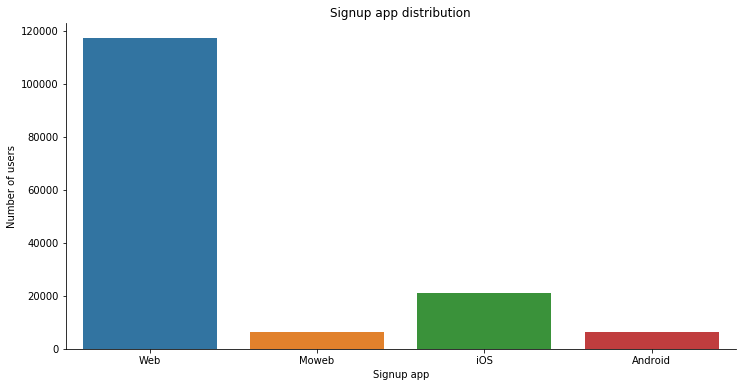

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='signup_app', data=df_without_NDF)
plt.xlabel('Signup app')
plt.ylabel('Number of users')
plt.title('Signup app distribution')
sns.despine()

Over 85% of all bookers in the data set signed up on Airbnb's website, over 10% of all bookers signed up with iOs. 

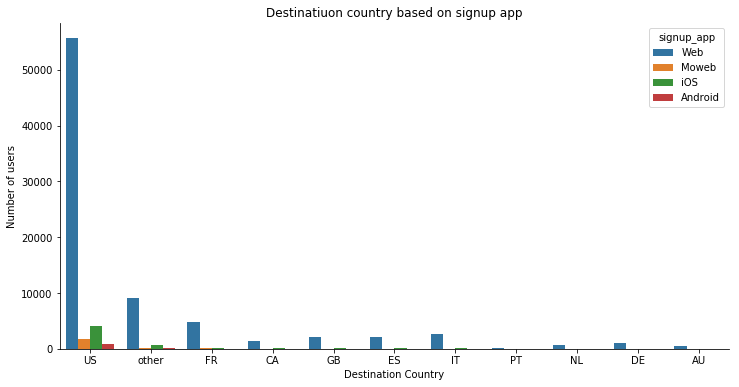

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF, hue='signup_app')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Destinatiuon country based on signup app')
sns.despine()

US bookers have more variety of sign up apps than bookers in other countries. To see more clearer, we remove the US.

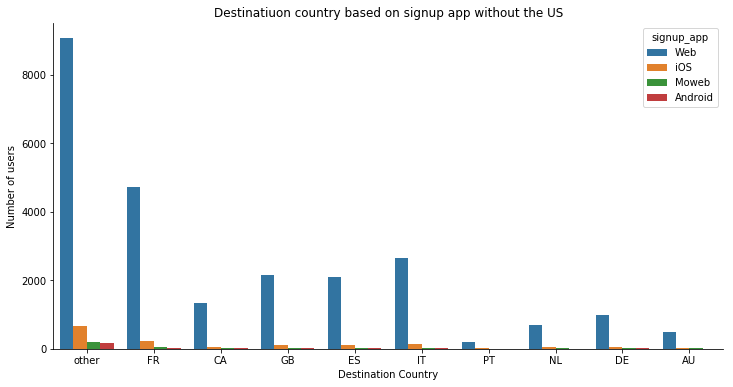

In [36]:
df_without_NDF_US = df_without_NDF[df_without_NDF['country_destination']!='US']
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue='signup_app')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Destinatiuon country based on signup app without the US')
sns.despine()

Signing up through Airbnb website is the most common sign up on booking every destination country in the data.

### Affiliate

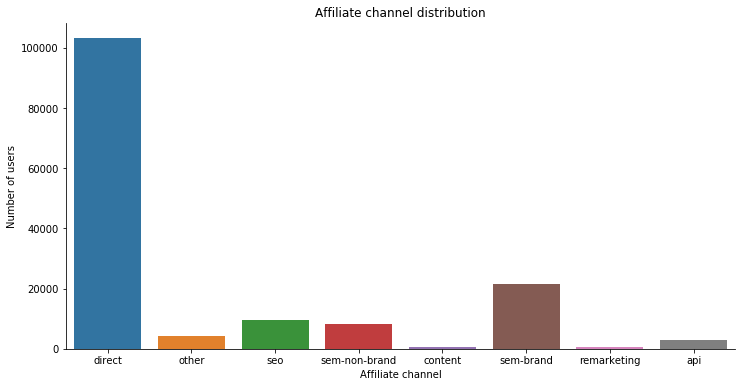

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='affiliate_channel', data=df_without_NDF)
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel distribution')
sns.despine()

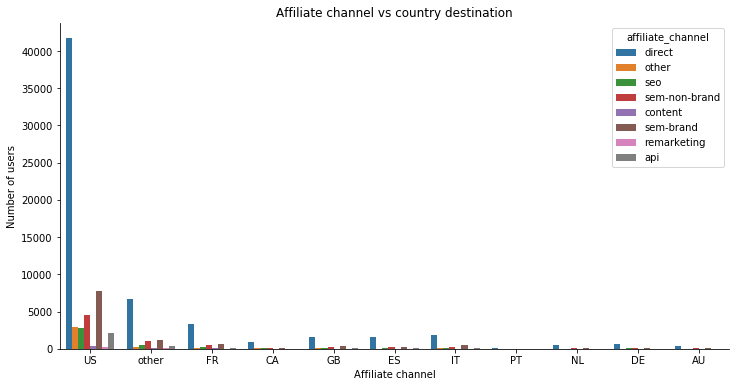

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF, hue = 'affiliate_channel')
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel vs country destination')
sns.despine()

Let's remove the US again.

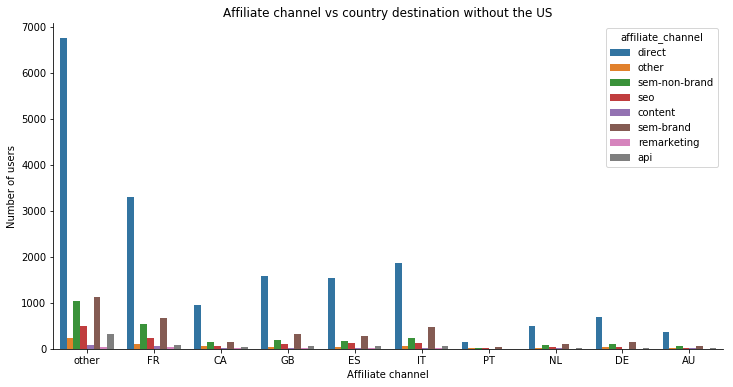

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue = 'affiliate_channel')
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel vs country destination without the US')
sns.despine()

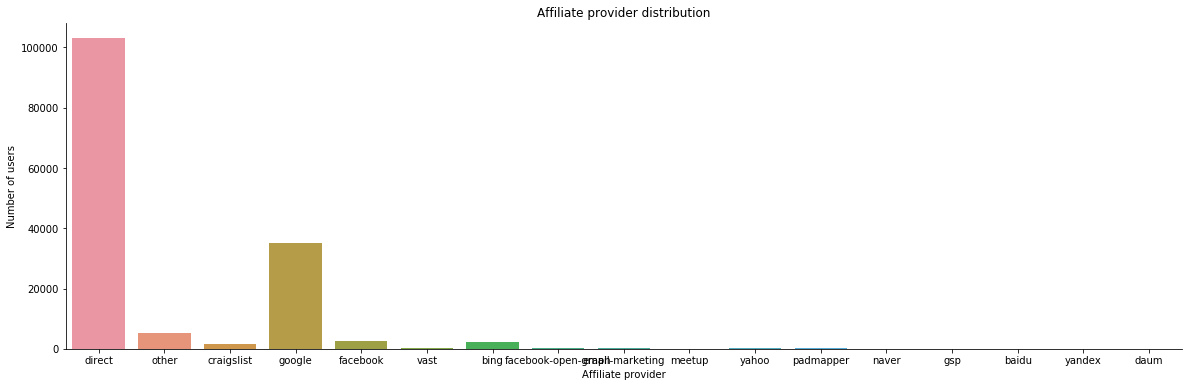

In [31]:
plt.figure(figsize=(20,6))
sns.countplot(x='affiliate_provider', data=df_without_NDF)
plt.xlabel('Affiliate provider')
plt.ylabel('Number of users')
plt.title('Affiliate provider distribution')
sns.despine()

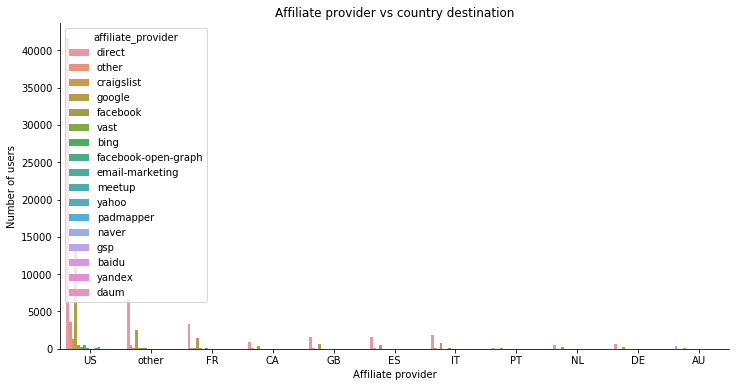

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF, hue = 'affiliate_provider')
plt.xlabel('Affiliate provider')
plt.ylabel('Number of users')
plt.title('Affiliate provider vs country destination')
sns.despine()

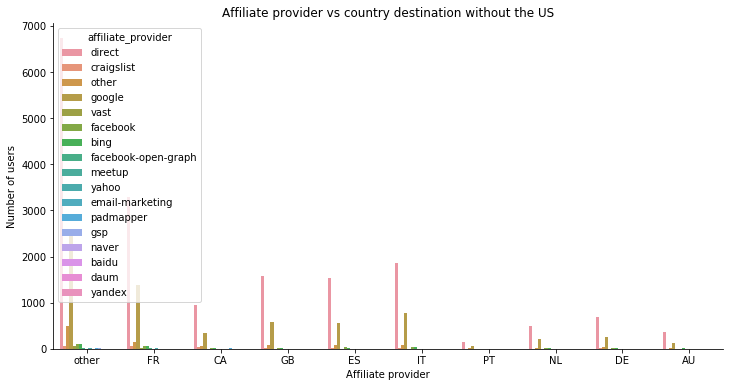

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue = 'affiliate_provider')
plt.xlabel('Affiliate provider')
plt.ylabel('Number of users')
plt.title('Affiliate provider vs country destination without the US')
sns.despine()

Approx. 65% of bookers signed up directly, without any affiliate program. And over 23% of bookers signed up through Google affiliate program, however, if you remember, there were only 0.26% of bookers signed up with their Google accounts.

### First

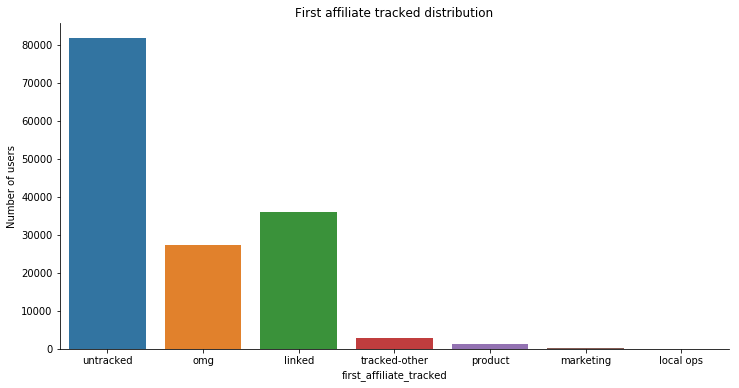

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='first_affiliate_tracked', data=df_without_NDF)
plt.ylabel('Number of users')
plt.title('First affiliate tracked distribution')
sns.despine()

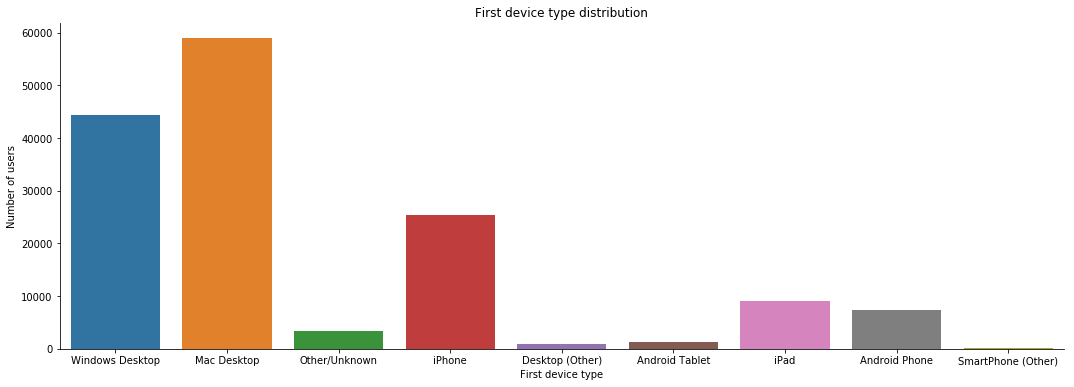

In [34]:
plt.figure(figsize=(18,6))
sns.countplot(x='first_device_type', data=df_without_NDF)
plt.xlabel('First device type')
plt.ylabel('Number of users')
plt.title('First device type distribution')
sns.despine()

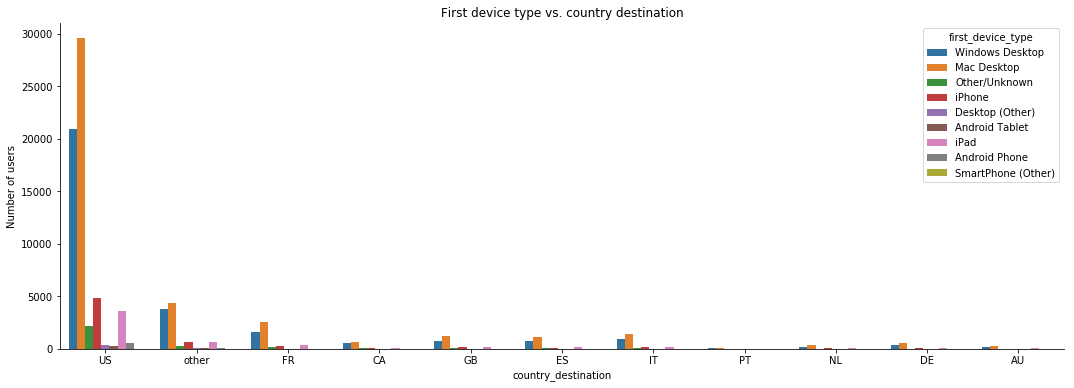

In [35]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=df_without_NDF, hue='first_device_type')
plt.ylabel('Number of users')
plt.title('First device type vs. country destination')
sns.despine()

Around 60% of bookers use Apple devices. Particularly in the US.

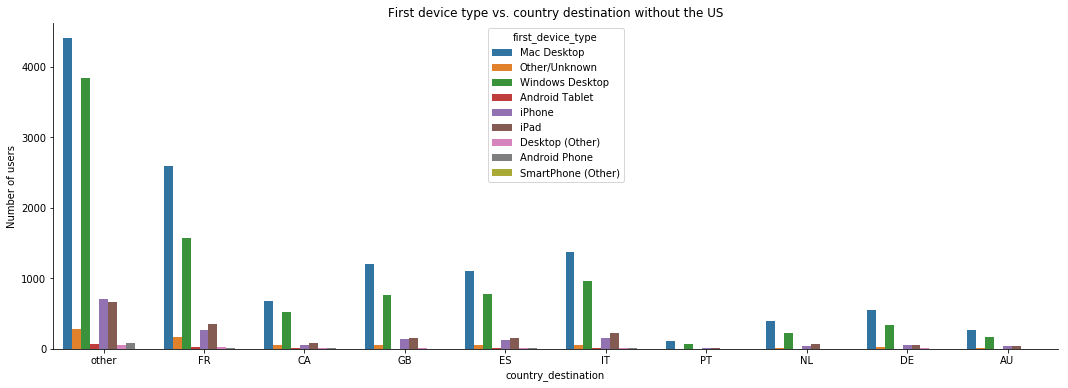

In [39]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue='first_device_type')
plt.ylabel('Number of users')
plt.title('First device type vs. country destination without the US')
sns.despine()

However, outside of the US, Windows descktop is far more common, in particular, there was little usage difference between Mac desktop and Windows desktop in Canada and Australia.

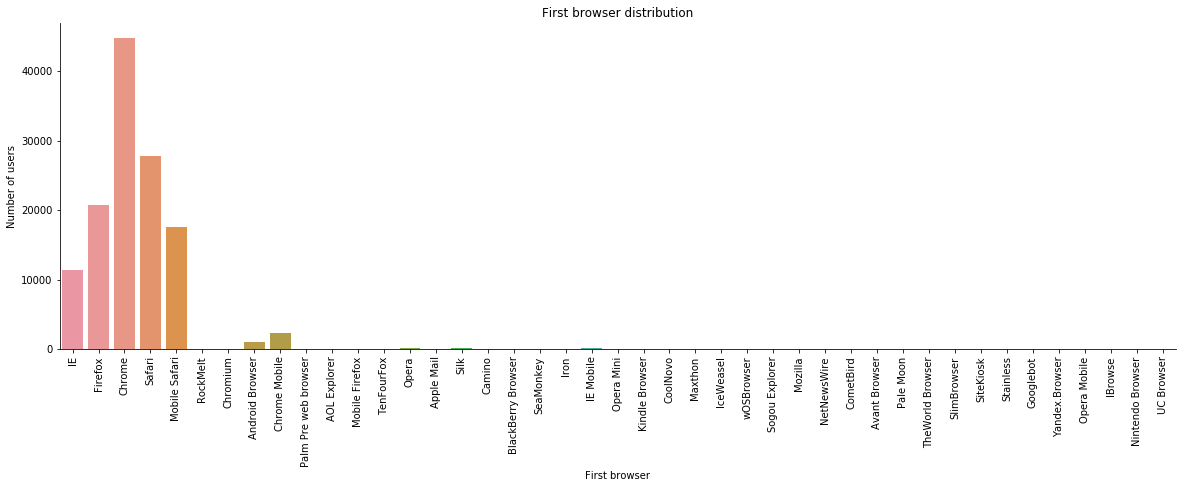

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(x='first_browser', data=df_without_NDF)
plt.xlabel('First browser')
plt.ylabel('Number of users')
plt.title('First browser distribution')
plt.xticks(rotation=90)
sns.despine()

Almost 30% of bookers in the data used Chrome browser.

### Users' Preferred Language

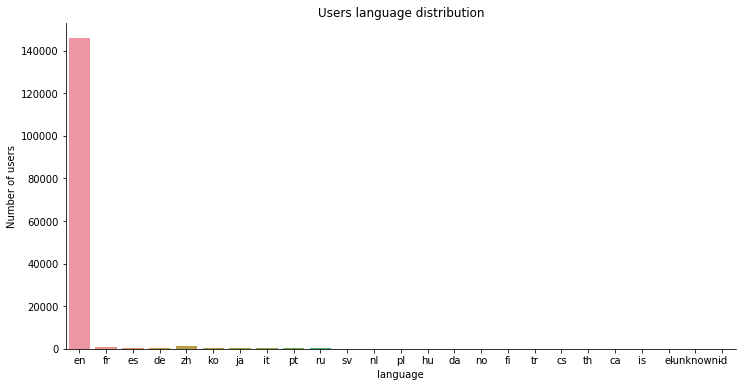

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution')
sns.despine()

Vast majority of the bookers' language preference is English, there is no surprise given most of the users in the data set are from the US.

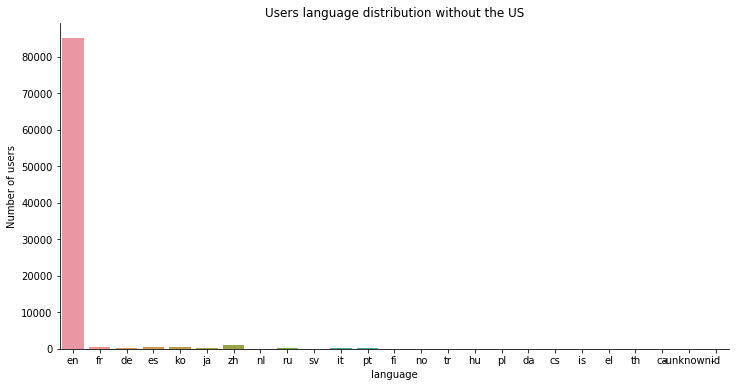

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF_US)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution without the US')
sns.despine()

Without the US, English is still the most preferred langauge, interestingly, Chinese is the 2nd most preferred languages for bookers.  

### Dates

In [27]:
df_without_NDF['date_account_created'] = pd.to_datetime(df_without_NDF['date_account_created'])
df_without_NDF['timestamp_first_active'] = pd.to_datetime((df_without_NDF.timestamp_first_active // 1000000), format='%Y%m%d')
# df_without_NDF['date_account_created_day'] = df_without_NDF.date_account_created.dt.weekday_name
# df_without_NDF['date_account_created_month'] = df_without_NDF.date_account_created.dt.month
# df_without_NDF['date_account_created_year'] = df_without_NDF.date_account_created.dt.year

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [28]:
df_without_NDF.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_account_created_day,date_account_created_month,date_account_created_year
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09,Tuesday,9,2010
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31,Monday,12,2011
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,M,87mebub9p4,en,Web,0,basic,2009-12-08,Tuesday,9,2010
5,other,other,NaN,US,2010-01-01,omg,Chrome,Mac Desktop,M,osr2jwljor,en,Web,0,basic,2010-01-01,Friday,1,2010
6,other,craigslist,46.0,US,2010-01-02,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,2010-01-02,Saturday,1,2010


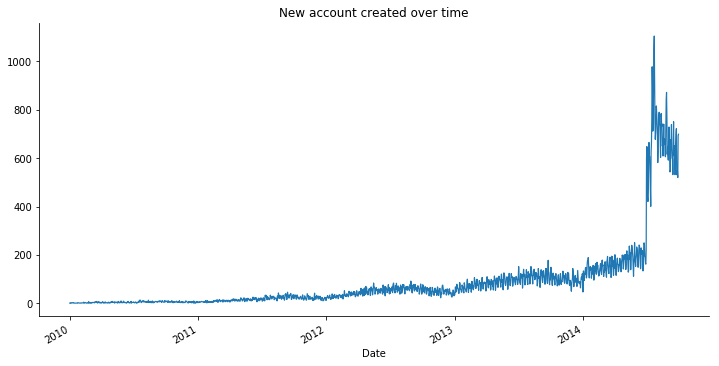

In [32]:
plt.figure(figsize=(12,6))
df_without_NDF.date_account_created.value_counts().plot(kind='line', linewidth=1.2)
plt.xlabel('Date')
plt.title('New account created over time')
sns.despine()

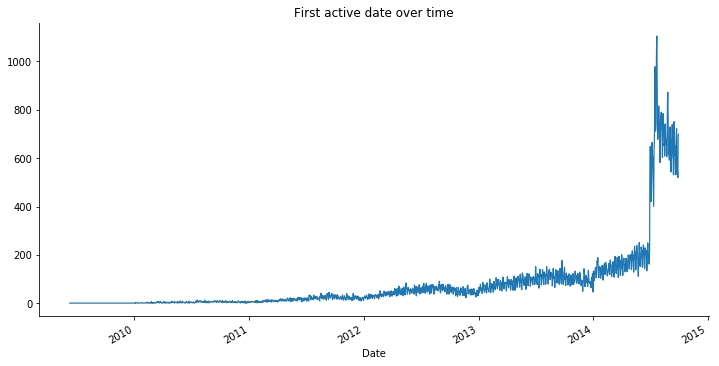

In [41]:
plt.figure(figsize=(12,6))
df_without_NDF.timestamp_first_active.value_counts().plot(kind='line', linewidth=1.2)
plt.xlabel('Date')
plt.title('First active date over time')
sns.despine()

The pattern looks similar between date account created and date first active, as it shoule be. From these two plots, we can see how fast Airbnb has grown in the past a few years.

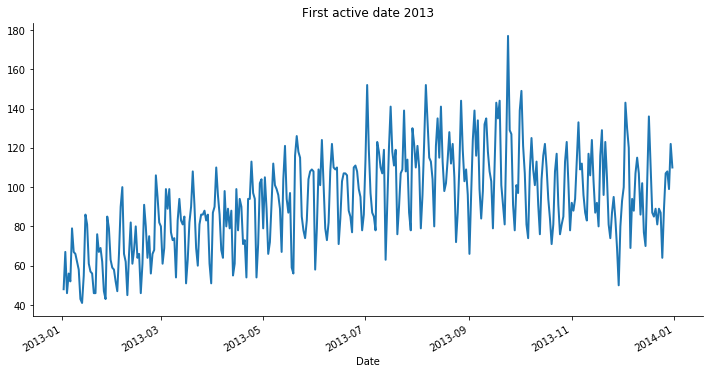

In [33]:
df_2013 = df_without_NDF[df_without_NDF['timestamp_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
df_2013 = df_2013[df_2013['timestamp_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
plt.figure(figsize=(12,6))
df_2013.timestamp_first_active.value_counts().plot(kind='line', linewidth=2)
plt.xlabel('Date')
plt.title('First active date 2013')
sns.despine()

When dive into 2013, we see that there were several peak months for Airbnb users such as July, August and October, and December is the least active month for Airbnb users. In addition, it follows a similar pattern, such as peaks and off-peaks at the similar distance.

## User Session Exploration 

In [34]:
sessions = pd.read_csv('sessions.csv')

print("There were", len(sessions.user_id.unique()), " unique user IDs in the session data.")

There were 135484  unique user IDs in the session data.


There are not many features in sessions data set, we can explore them one by one.

In [35]:
sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [36]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


### Action Type

In [37]:
sessions.action_type.unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

We have "NaN" and "unknown" in the action type. So we will change "unknown" to "NaN".

In [38]:
sessions.action_type.replace('-unknown-', np.nan, inplace = True)

In [39]:
sessions.action_type.value_counts()

view                3560902
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

### Action

In [40]:
sessions.action.value_counts().head(10)

show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
Name: action, dtype: int64

### Action detail

In [198]:
sessions.action_detail.value_counts().head(10)

view_search_results            1776885
p3                             1376550
-unknown-                      1031141
wishlist_content_update         706824
user_profile                    656839
change_trip_characteristics     487744
similar_listings                364624
user_social_connections         336799
update_listing                  269779
listing_reviews                 269021
Name: action_detail, dtype: int64

### Device type

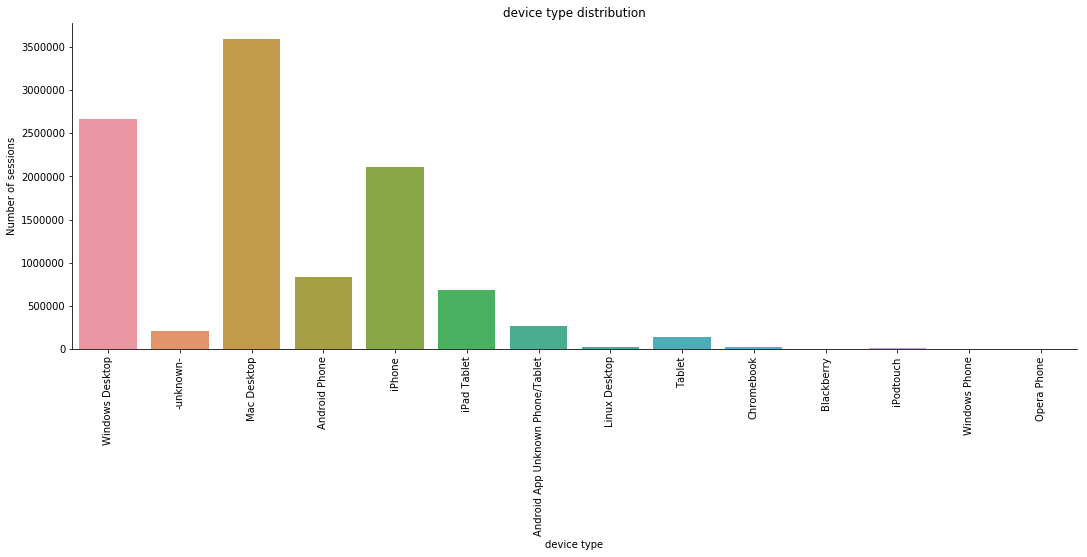

In [202]:
plt.figure(figsize=(18,6))
sns.countplot(x='device_type', data=sessions)
plt.xlabel('device type')
plt.ylabel('Number of sessions')
plt.title('device type distribution')
plt.xticks(rotation=90)
sns.despine()

This affirms the previous discovery about users. The most common device type among Airbnb users are Apple products.

### Sessions of Users who had made bookings

From the previous analysis, we know which users had made bookings through Airbnb, so we want to explore these bookers session data. Are they different with non-bookers?

In [205]:
df_without_NDF.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_account_created_day,date_account_created_month,date_account_created_year
2,4ft3gnwmtx,2010-09-28,2009-06-09,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Tuesday,9,2010
3,bjjt8pjhuk,2011-12-05,2009-10-31,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Monday,12,2011
4,87mebub9p4,2010-09-14,2009-12-08,M,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,Tuesday,9,2010
5,osr2jwljor,2010-01-01,2010-01-01,M,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,Friday,1,2010
6,lsw9q7uk0j,2010-01-02,2010-01-02,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,Saturday,1,2010


In [206]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [207]:
booker_session = pd.merge(df_without_NDF, sessions, how = 'left', left_on = 'id', right_on = 'user_id')

### Bookers action type

In [209]:
booker_session.action_type.value_counts()

view                748404
data                516182
click               481757
submit              138407
message_post         32299
booking_request       9081
partner_callback      3798
booking_response         1
Name: action_type, dtype: int64

### Bookers top actions

In [210]:
booker_session.action.value_counts().head(10)

show                     547951
personalize              211836
index                    209351
search_results           192670
ajax_refresh_subtotal    157051
similar_listings         147387
search                    66580
update                    63860
lookup                    62281
social_connections        47225
Name: action, dtype: int64

Unfortunately, there was no significant difference in actions between bookers and all users.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')
df = pd.concat((train_users, test_users), axis=0, ignore_index=True)
df.drop('date_first_booking', axis=1, inplace=True)

### Date time features

Cast date time column to property date time format, Split dates into day, week, month, year, Get the difference(time lag) between the date in which the account was created and when it was first active.

In [38]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['timestamp_first_active'] = pd.to_datetime((df.timestamp_first_active // 1000000), format='%Y%m%d')
df['weekday_account_created'] = df.date_account_created.dt.weekday_name
df['day_account_created'] = df.date_account_created.dt.day
df['month_account_created'] = df.date_account_created.dt.month
df['year_account_created'] = df.date_account_created.dt.year
df['weekday_first_active'] = df.timestamp_first_active.dt.weekday_name
df['day_first_active'] = df.timestamp_first_active.dt.day
df['month_first_active'] = df.timestamp_first_active.dt.month
df['year_first_active'] = df.timestamp_first_active.dt.year
df['time_lag'] = (df['date_account_created'] - df['timestamp_first_active'])
df['time_lag'] = df['time_lag'].astype(pd.Timedelta).apply(lambda l: l.days)

cols_to_drop = ['date_account_created', 'timestamp_first_active']
df.drop(cols_to_drop, axis=1, inplace=True)

In [39]:
df.columns

Index(['affiliate_channel', 'affiliate_provider', 'age', 'country_destination',
       'first_affiliate_tracked', 'first_browser', 'first_device_type',
       'gender', 'id', 'language', 'signup_app', 'signup_flow',
       'signup_method', 'weekday_account_created', 'day_account_created',
       'month_account_created', 'year_account_created', 'weekday_first_active',
       'day_first_active', 'month_first_active', 'year_first_active',
       'time_lag'],
      dtype='object')

### Age features

Convert year to age, set limits to age, and fill NaNs with -1.

In [40]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 16, 'age'] = np.nan
df['age'].fillna(-1, inplace=True)

### User session action features

Group by user_id, count the number of times an action, action type and action detail is made by each user. Doing groupby.agg(len) is roughly twice as fast as groupby.size(). Therefore, I am using groupby.agg(len). For device type, we group by user_id, sum up total secs_elapses for each user. Finally, we add a new column named "most_used_device" for each user most used device.

In [41]:
sessions = pd.read_csv('sessions.csv')
sessions.rename(columns={'user_id': 'id'}, inplace=True)
action_count = sessions.groupby(['id', 'action'])['secs_elapsed'].agg(len).unstack()
action_type_count = sessions.groupby(['id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_detail_count = sessions.groupby(['id', 'action_detail'])['secs_elapsed'].agg(len).unstack()
device_type_sum = sessions.groupby(['id', 'device_type'])['secs_elapsed'].agg(sum).unstack()

sessions_data = pd.concat([action_count, action_type_count, action_detail_count, device_type_sum],axis=1)
sessions_data.columns = sessions_data.columns.map(lambda x: str(x) + '_count')

# Most used device
sessions_data['most_used_device'] = sessions.groupby('id')['device_type'].max()

In [42]:
print('There were', sessions.shape[0], 'recorded sessions to which there were', sessions.id.nunique(), 'unique users.')

There were 10567737 recorded sessions to which there were 135483 unique users.


In [43]:
sessions_data.index.names = ['id']
sessions_data.reset_index(inplace=True)

### User sessions secs_elapsed features

We will extract information from secs_elapsed feature for each user, such as sum, mean, min, max, median, variance, if the sum of secs_elapsed is greater than 86,400 second, we consider day_pause, if the sum of secs_elapsed is greater than 300,000 seconds, we consider it is a long pause, and if the sum of secs_elapsed is shorter than 3,600 seconds, we consider it is a short pause.

In [44]:
secs_elapsed = sessions.groupby('id')['secs_elapsed']

secs_elapsed = secs_elapsed.agg(
    {
        'secs_elapsed_sum': np.sum,
        'secs_elapsed_mean': np.mean,
        'secs_elapsed_min': np.min,
        'secs_elapsed_max': np.max,
        'secs_elapsed_median': np.median,
        'secs_elapsed_std': np.std,
        'secs_elapsed_var': np.var,
        'day_pauses': lambda x: (x > 86400).sum(),
        'long_pauses': lambda x: (x > 300000).sum(),
        'short_pauses': lambda x: (x < 3600).sum(),
        'session_length' : np.count_nonzero
    }
)
secs_elapsed.reset_index(inplace=True)
sessions_secs_elapsed = pd.merge(sessions_data, secs_elapsed, on='id', how='left')
df = pd.merge(df, sessions_secs_elapsed, on='id', how = 'left')

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


In [45]:
secs_elapsed.head()

,id,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_min,secs_elapsed_max,secs_elapsed_median,secs_elapsed_std,secs_elapsed_var,day_pauses,long_pauses,short_pauses,session_length
0,00023iyk9l,867896.0,22253.743590,0.0,567165.0,850.0,92242.561900,8.508690e+09,2.0,1.0,29.0,39.0
1,0010k6l0om,586543.0,9460.370968,3.0,127898.0,948.5,22751.227918,5.176184e+08,2.0,0.0,46.0,63.0
2,001wyh0pz8,282965.0,3179.382022,35.0,50548.0,1105.0,6569.648182,4.316028e+07,0.0,0.0,71.0,90.0
3,0028jgx1x1,297010.0,9900.333333,3.0,84636.0,1614.0,18004.964337,3.241787e+08,0.0,0.0,17.0,31.0
4,002qnbzfs5,6487080.0,8232.335025,0.0,1418284.0,498.0,58110.646170,3.376847e+09,13.0,3.0,602.0,787.0


In [46]:
print('There are', df.id.nunique(), 'users from the entire user data set that have session information.')

There are 275547 users from the entire user data set that have session information.


### Encoding categorical features 

In [47]:
categorical_features = ['gender', 'signup_method', 'signup_flow', 'language','affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'most_used_device', 'weekday_account_created', 'weekday_first_active']
df = pd.get_dummies(df, columns=categorical_features)

In [48]:
df.set_index('id', inplace=True)
train_df = df.loc[train_users['id']]
test_df = df.loc[test_users['id']].drop('country_destination', axis=1)
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
train_df.fillna(-1, inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder

y_train = train_df['country_destination']
train_df.drop(['country_destination', 'id'], axis=1, inplace=True)
x_train = train_df.values

label_encoder = LabelEncoder()
encoded_y_train = label_encoder.fit_transform(y_train)

In [50]:
import xgboost as xgb

xgtrain = xgb.DMatrix(x_train, label=encoded_y_train)

### Normalized Discounted Cumulative Gain (NDCG)

The evaluation metric is NDCG @k where k=5. So we select top 5 then get the average.

In [51]:
def ndcg_score(preds, dtrain):
    labels = dtrain.get_label()
    top = []

    for i in range(preds.shape[0]):
        top.append(np.argsort(preds[i])[::-1][:5])

    mat = np.reshape(np.repeat(labels,np.shape(top)[1]) == np.array(top).ravel(),np.array(top).shape).astype(int)
    score = np.mean(np.sum(mat/np.log2(np.arange(2, mat.shape[1] + 2)),axis = 1))
    return 'ndcg', score

We set the general parameters, tree booster parameters and learning task parameters as follows, and our evaluation metrics is mlogloss (Multiclass logloss). The detailed guide on how to set Xgboost parameters can be found on its official website. 

In [53]:
param = {
    'max_depth': 10,
    'learning_rate': 1,
    'n_estimators': 5,
    'objective': 'multi:softprob',
    'num_class': 12,
    'gamma': 0,
    'min_child_weight': 1,
    'max_delta_step': 0,
    'subsample': 1,
    'colsample_bytree': 1,
    'colsample_bylevel': 1,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'base_score': 0.5,
    'missing': None,
    'silent': True,
    'nthread': 4,
    'seed': 42
}
# Do cross validation
num_round = 5
xgb.cv(param, xgtrain, num_boost_round=num_round, metrics=['mlogloss'], feval=ndcg_score)

,test-mlogloss-mean,test-mlogloss-std,test-ndcg-mean,test-ndcg-std,train-mlogloss-mean,train-mlogloss-std,train-ndcg-mean,train-ndcg-std
0,1.217951,0.006288,0.827582,0.000760,1.169001,0.001019,0.836515,0.000507
1,1.461221,0.011611,0.746653,0.002862,1.355022,0.016621,0.767310,0.001826
2,1.173415,0.019579,0.820226,0.000849,1.042072,0.030455,0.846295,0.001097
3,2.304768,0.920188,0.773338,0.014774,2.147041,0.967472,0.805529,0.016622
4,1.393931,0.098129,0.817316,0.000830,1.196478,0.114288,0.853830,0.001706


From the above script, the highest average test NDCG score we have achieved is 0.827582.